**Nome:** Bruno Mazetti Saito

**NUSP:** 11221838

In [ ]:
import numpy as np

**MAPA**

Definição das dimensões do mapa e inicialização das qualidades para cada estado

Definição das possíveis ações a serem tomadas


*   Ir para cima = índice 0
*   Ir para a direita = Índice 1
*   Ir para baixo = índice 2
*   Ir para a esquerda = Índice 3

In [ ]:
mapa_linhas = 3
mapa_colunas = 4

matrizQ = np.zeros ((mapa_linhas, mapa_colunas, 4))
tedio = np.ones ((mapa_linhas, mapa_colunas, 4))
visitas = np.zeros ((mapa_linhas, mapa_colunas, 4))

**RECOMPENSAS**

Definição das recompensas de cada estado

In [ ]:
recompensas = np.full ((mapa_linhas, mapa_colunas), -1)
recompensas[0, 3] = 100
recompensas[1, 1] = -100

print ("Matriz de recompensas: ")
print (recompensas)

Matriz de recompensas: 
[[  -1   -1   -1  100]
 [  -1 -100   -1   -1]
 [  -1   -1   -1   -1]]


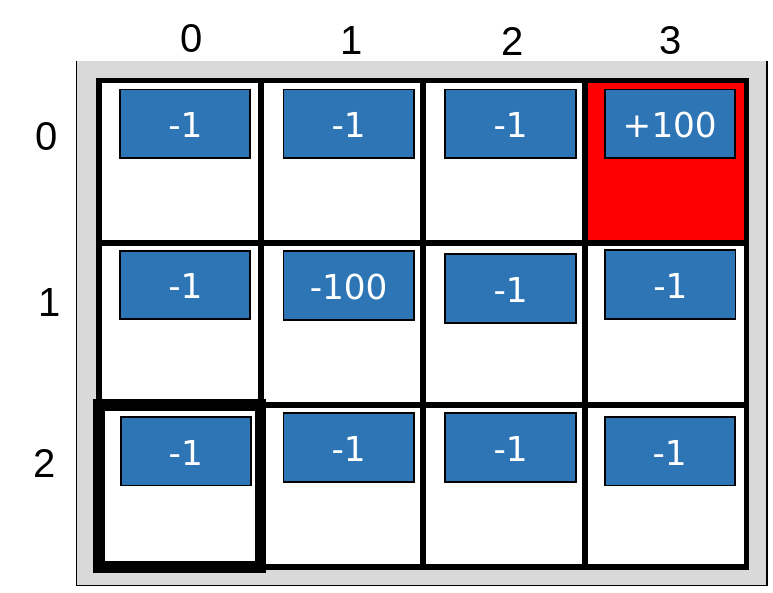

**Funções Auxiliares**




*   chegou_destino -> Verifica se a posição atual é o estado terminal;
*   escolhe_acao -> Escolhe uma ação em que em taxa% das vezes é determinada pela melhor qualidade possível e em (1 - taxa)% o agente segue uma direção aleatória;
*   valida_acao -> Verifica se o agente não vai sair do mapa fazendo a ação escolhida por escolhe_acao;
*   realiza_acao -> Após a verificação da ação, realiza a ação;
*   menor_prejuizo -> Após o agente conhecer o mapa, encontra e retorna o caminho com o menor prejuízo a partir da posição inicial dada.

In [ ]:
def chegou_destino (linha, coluna):
    if recompensas[linha, coluna] == 100:
        return True
    return False

def escolhe_acao (linha, coluna, taxa):
    x = np.random.random ()
    if x <= taxa:
        if np.count_nonzero (np.max (matrizQ [linha, coluna])) > 1:
            y = np.argmax (np.abs (tedio [linha, coluna]))
        else:
            y = np.argmax (matrizQ [linha, coluna])
    else:
        y = np.random.randint(4)
    visitas [linha, coluna, y] += 1
    return y

def valida_acao (linha, coluna, acao):
    # Tenta ir para cima
    if acao == 0 and linha > 0:
        return True
    # Tenta ir para a direita
    elif acao == 1 and coluna < mapa_colunas - 1:
        return True
    # Tenta ir para baixo
    elif acao == 2 and linha < mapa_linhas - 1:
        return True
    # Tenta ir para a esquerda
    elif acao == 3 and coluna > 0:
        return True
    # Não consegue fazer a ação
    return False

def realiza_acao (linha, coluna, acao):
    nova_linha, nova_coluna = linha, coluna
    if acao == 0:
        nova_linha -= 1
    elif acao == 1:
        nova_coluna += 1
    elif acao == 2:
        nova_linha += 1
    elif acao == 3:
        nova_coluna -= 1
    return nova_linha, nova_coluna

  
def menor_prejuizo (lin_inicio, col_inicio):
    if chegou_destino (lin_inicio, col_inicio):
        return []
    
    cur_row = lin_inicio
    cur_col = col_inicio
    caminho = []
    caminho.append ([cur_row, cur_col])

    while not chegou_destino (cur_row, cur_col):
        acao = escolhe_acao (cur_row, cur_col, 1.)
        if valida_acao (cur_row, cur_col, acao):
            cur_row, cur_col = realiza_acao (cur_row, cur_col, acao)
            caminho.append ([cur_row, cur_col])

    return caminho

**Função Principal**

A função treina é responsável pelo treinamento e pelo conhecimento do mapa do agente, nela, definimos a quantidade de episódios suficientes para que o agente possa conhecer relativamente bem o mapa.

In [ ]:
def treina (desconto):
    chance = 0.8

    posicao_inicial = [2, 0]
    posicao_final = [0, 3]

    ''' print ("linha atual == ", lin_atual, " coluna atual == ", col_atual) '''

    for episodios in range (20):
        lin_atual = lin_ant = posicao_inicial[0]
        col_atual = col_ant = posicao_inicial[1]
        caminho = [posicao_inicial]

        while not chegou_destino (lin_atual, col_atual):
            nova_acao = escolhe_acao (lin_atual, col_atual, chance)
            ''' print ("nova ação == ", nova_acao) '''
            lin_ant = lin_atual
            col_ant = col_atual

            if valida_acao (lin_atual, col_atual, nova_acao):
                lin_atual, col_atual = realiza_acao (lin_atual, col_atual, nova_acao)
            
                rec = recompensas[lin_atual, col_atual]
                q_anterior = matrizQ [lin_ant, col_ant, nova_acao]
                if visitas [lin_ant, col_ant, nova_acao] != 0:
                    learning_rate = 1 / visitas [lin_ant, col_ant, nova_acao]
                diferenca_temporal = rec + desconto * np.max(matrizQ [lin_atual, col_atual]) - q_anterior
                matrizQ [lin_ant, col_ant, nova_acao] = q_anterior + learning_rate * diferenca_temporal
                if visitas [lin_ant, col_ant, nova_acao] != 0:
                    tedio [lin_ant, col_ant, nova_acao] = matrizQ [lin_ant, col_ant, nova_acao] / visitas [lin_ant, col_ant, nova_acao]

                caminho.append ([lin_atual, col_atual])
            

Neste bloco abaixo, iniciamos o treinamento do agente e em seguida imprimimos o caminho ideal encontrado.

Para o primeiro cenário, foi possível utilizar 20 episódios para que o agente tivesse um conhecimento necessário, além disso, também foi utilizado os seguintes parâmetros para o Q-learning:

*   Learning rate ($\alpha$) = 1/N caso N != 0 
*   Exploration rate ($\gamma$) = 1

O resultado esperado poderia ser qualquer caminho passando por apenas 6 estados 
que não passe por [1, 1], assim, vemos, que o resultado encontrado corresponde ao esperado intuitivamente e foram necessários 20 episódios.

In [ ]:
treina (1)

print ("\nCaminho escolhido pelo algoritmo: ")
print (menor_prejuizo (2, 0))


Caminho escolhido pelo algoritmo: 
[[2, 0], [2, 1], [2, 2], [2, 3], [1, 3], [0, 3]]


**Recompensa Positiva no Mapa**

Aqui fazemos o mesmo processo feito anteriormente mas alteramos o mapa para conter a recompensa positiva

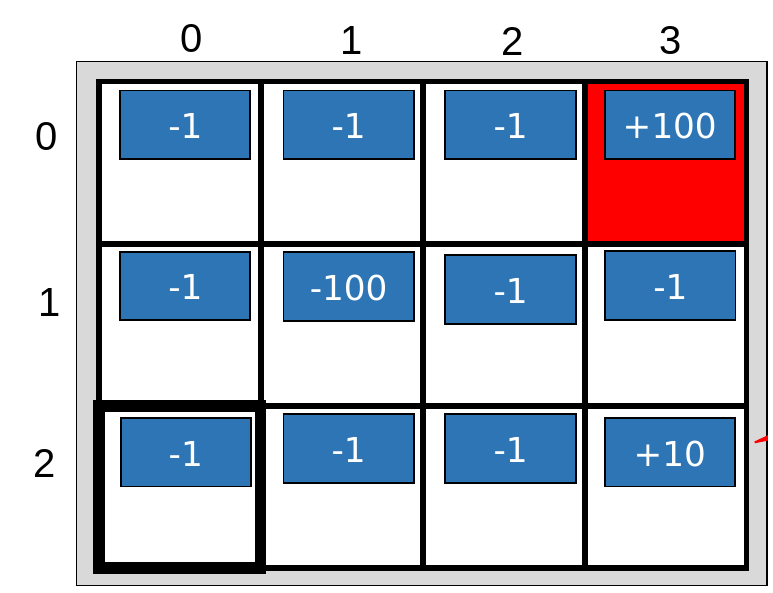

Para o segundo cenário, com as recompensas dispostas como acima, utilizar a taxa de exploração ($\gamma$) igual a 1 como no primeiro item, o algoritmo entra em um loop infinito, então foi necessário alterar este valor para 0.8, dessa forma, o algoritmo retorna o caminho correspondente ao esperado intuitivamente que é passar por [2, 3] uma única vez. 

In [ ]:
matrizQ = np.zeros ((mapa_linhas, mapa_colunas, 4))
tedio = np.ones ((mapa_linhas, mapa_colunas, 4))
visitas = np.zeros ((mapa_linhas, mapa_colunas, 4))
recompensas[2, 3] = 10

treina (0.8)

print ("\nCaminho escolhido pelo algoritmo: ")
print (menor_prejuizo (2, 0))


Caminho escolhido pelo algoritmo: 
[[2, 0], [2, 1], [2, 2], [1, 2], [0, 2], [0, 3]]
